In [62]:
import pandas as pd 
train_df = pd.read_csv("../new_data.csv")
train_df = train_df.drop(["id", "CustomerId"], axis=1)

* Define Problems:
1. Are users similar?
2. The most important feature

In [76]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# The Most Important Feature

In [64]:
class Processor:
    def onehot(df):
        object_df = df.select_dtypes(include=['object'])
        object_column = object_df.columns
        return df.drop(object_column, axis=1).join(pd.get_dummies(object_df, prefix=object_column))
        
    def split(df, title):
        return df.drop(title, axis=1), df[title]
    

* Data Processing

In [65]:
processed_train = Processor.onehot(train_df.copy()) 
processed_train.fillna(value=0, inplace=True)
train_x, test_x, train_y, test_y = train_test_split(*Processor.split(processed_train, "Exited"), test_size=.2)


* Modeling Building

In [66]:
classifier = RandomForestClassifier(n_jobs=-1)
classifier.fit(train_x, train_y)

RandomForestClassifier(n_jobs=-1)

In [67]:
feature_names = train_x.columns
feature_importance = classifier.feature_importances_
feature_importance_dict = dict(zip(feature_names, feature_importance))
sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)
first_element = [t[0] for t in sorted_features]
first_element[:15]

['Age',
 'NumOfProducts',
 'CreditScore',
 'EstimatedSalary',
 'Balance',
 'Tenure',
 'IsActiveMember',
 'Geography_Germany',
 'Geography_France',
 'Gender_Male',
 'Gender_Female',
 'HasCrCard',
 'Geography_Spain',
 'Surname_McGregor',
 'Surname_Hsia']

# Similar Users with KNN

# Binary Classification

In [125]:
def ploting(title, k = - 1):
    plt.figure(figsize=(20, 8))

    # Assuming train_df is your DataFrame
    total_counts = train_df[title].value_counts().sort_index()

    # Calculate percentages for Exited=0
    exited_0 = train_df[train_df["Exited"] == 0][title].value_counts().sort_index()
    exited_0_percentage = exited_0 / total_counts

    # Calculate percentages for Exited=1
    exited_1 = train_df[train_df["Exited"] == 1][title].value_counts().sort_index()
    exited_1_percentage = exited_1 / total_counts

    # Combine percentages into a DataFrame
    combined_data = pd.DataFrame({'Exited_0': exited_0_percentage, 'Exited_1': exited_1_percentage})
    # Plot the joint bar chart
     
    combined_data_grouped = combined_data.groupby(pd.cut(total_counts.index, k, precision=0)).sum() if k != -1 else combined_data
    combined_data_grouped.sort_index().plot(kind='bar', figsize=(20, 8))

    plt.title(f'Percentage of {title} Distribution for Exited = 0 and Exited = 1')
    plt.xlabel(title)
    plt.ylabel('Percentage')
    plt.show()


<Axes: xlabel='NumOfProducts'>

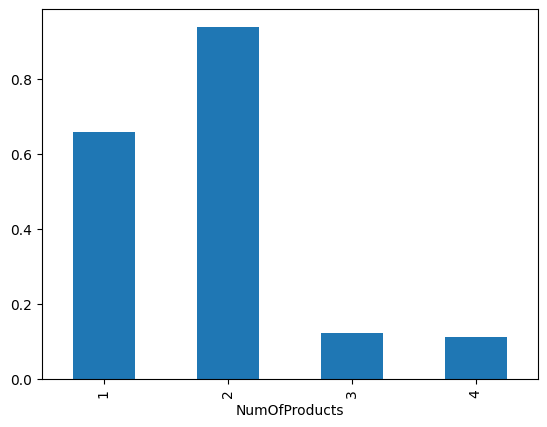

In [151]:
test = train_df[train_df['Exited'] == 0]['NumOfProducts'].value_counts().sort_index() / train_df['NumOfProducts'].value_counts().sort_index()
test.plot(kind='bar')

<Figure size 2000x800 with 0 Axes>

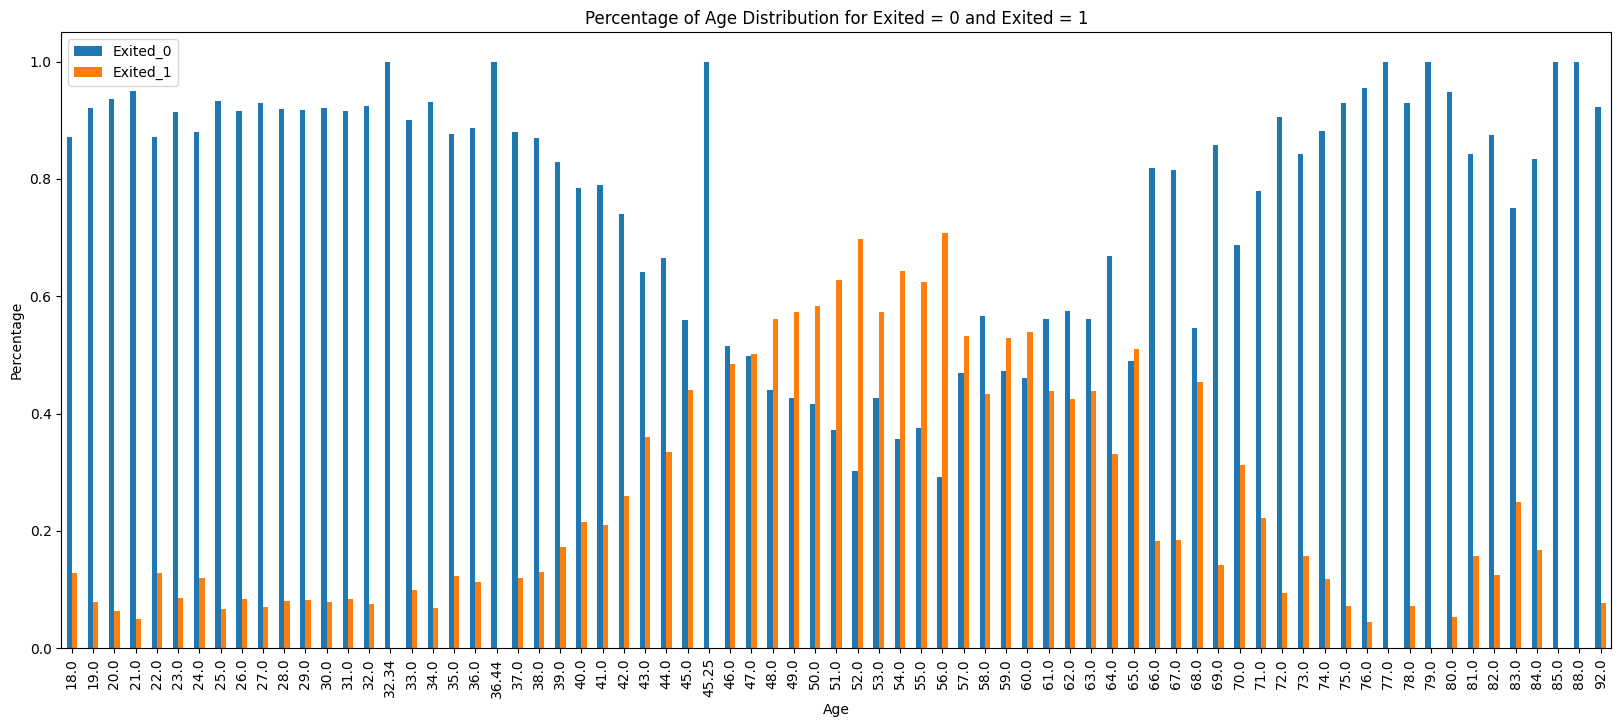

<Figure size 2000x800 with 0 Axes>

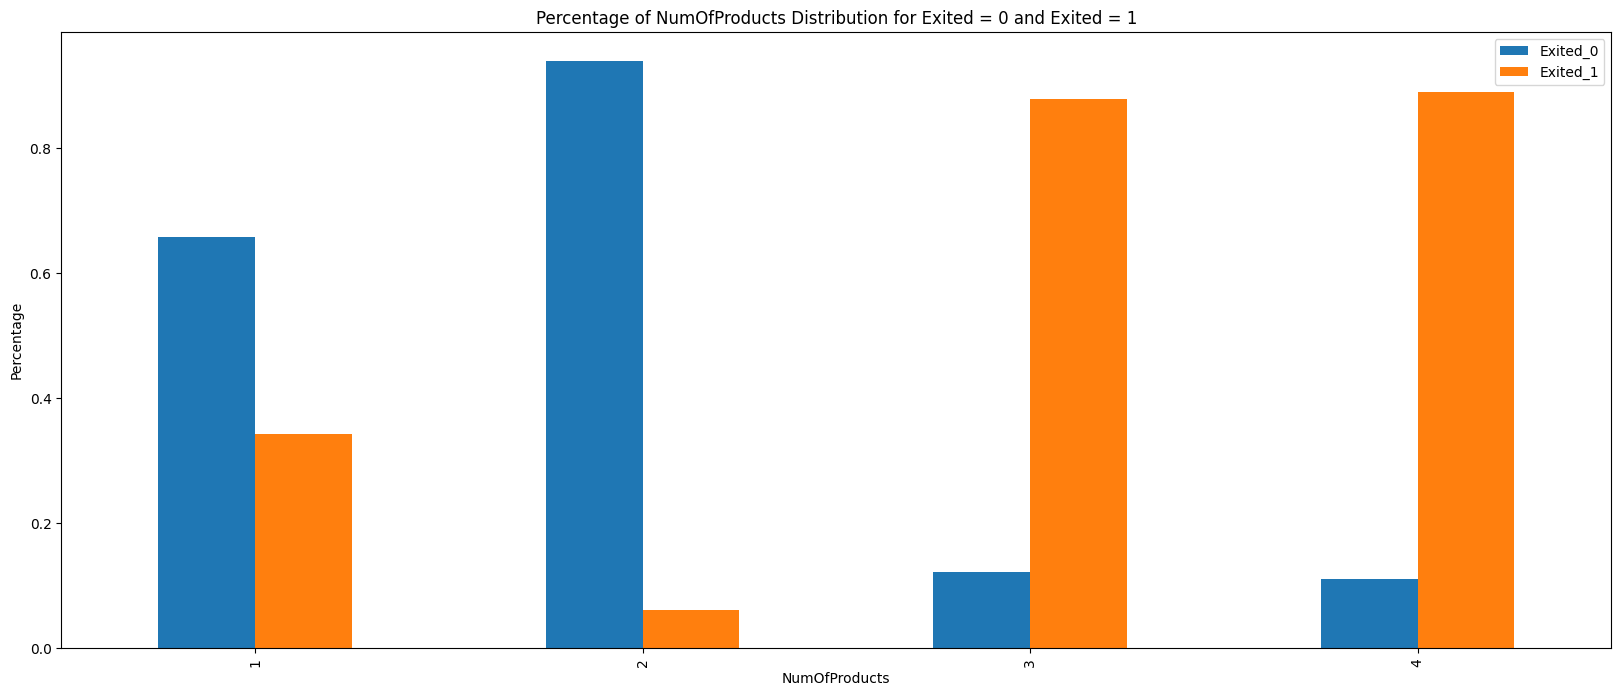

<Figure size 2000x800 with 0 Axes>

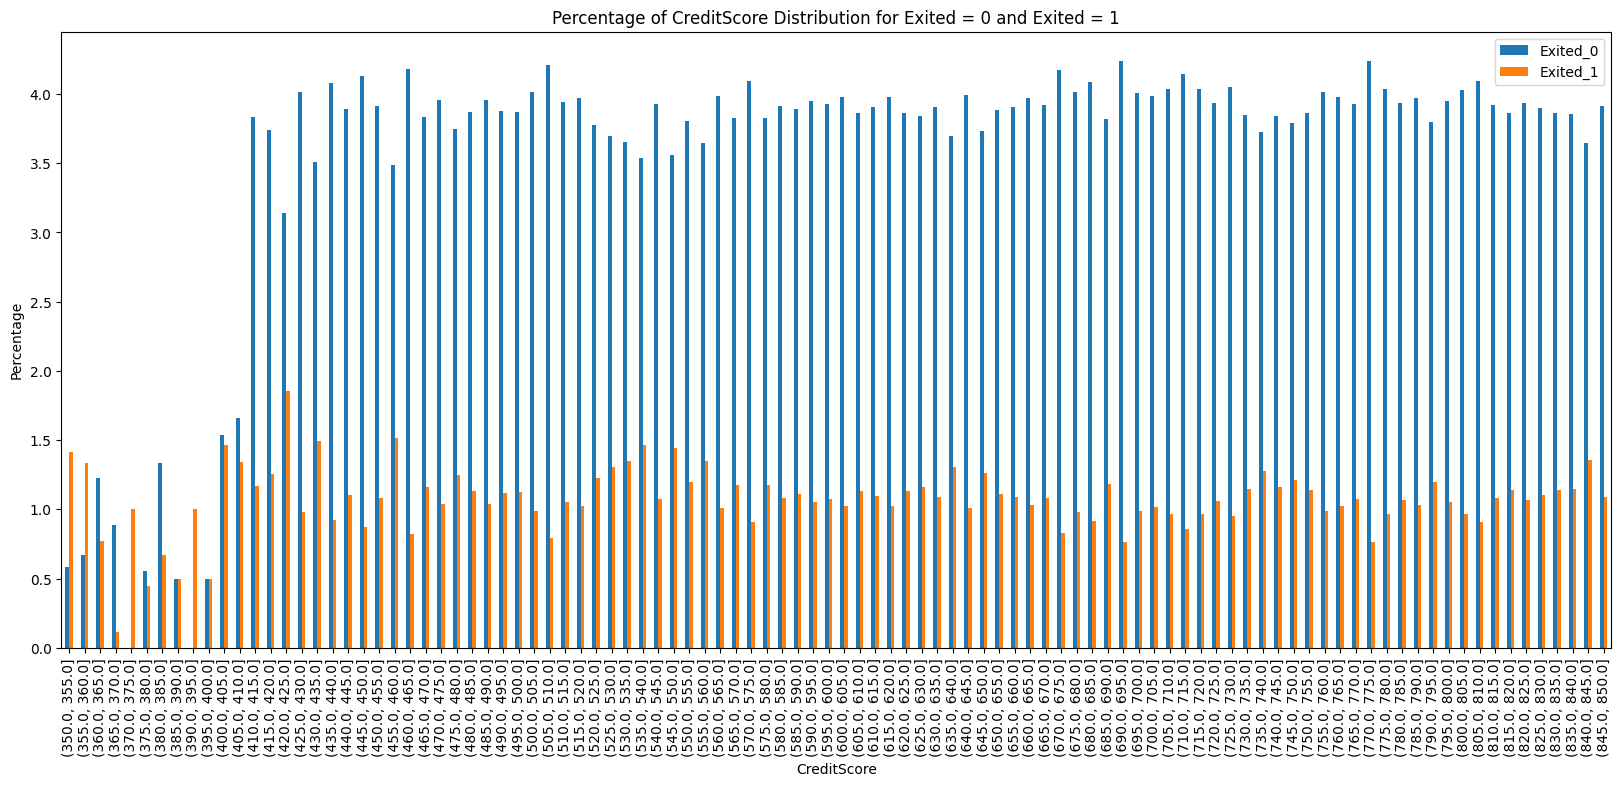

<Figure size 2000x800 with 0 Axes>

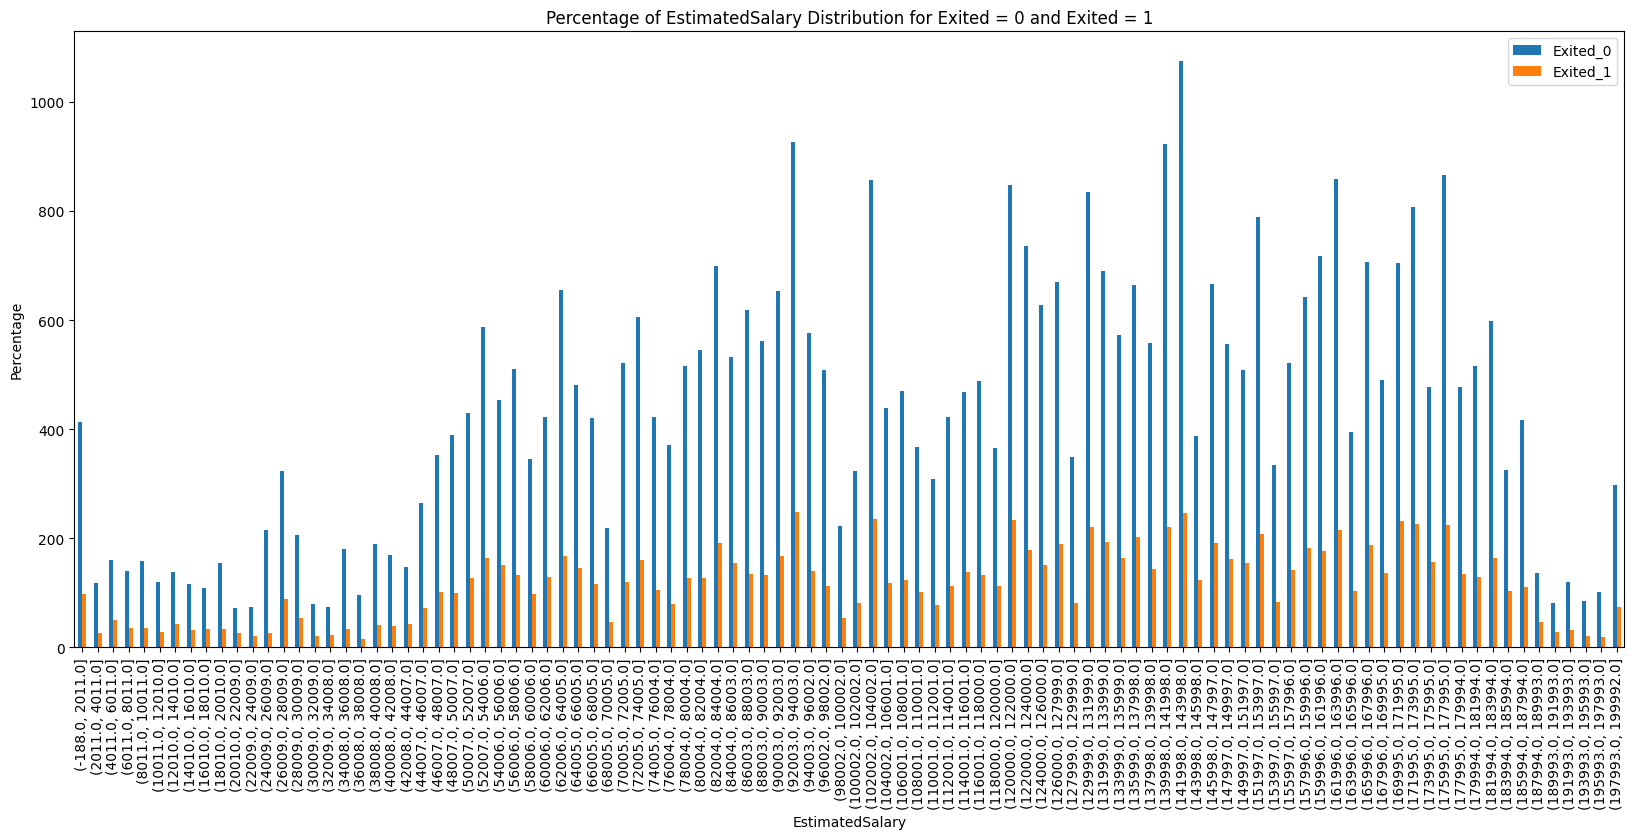

<Figure size 2000x800 with 0 Axes>

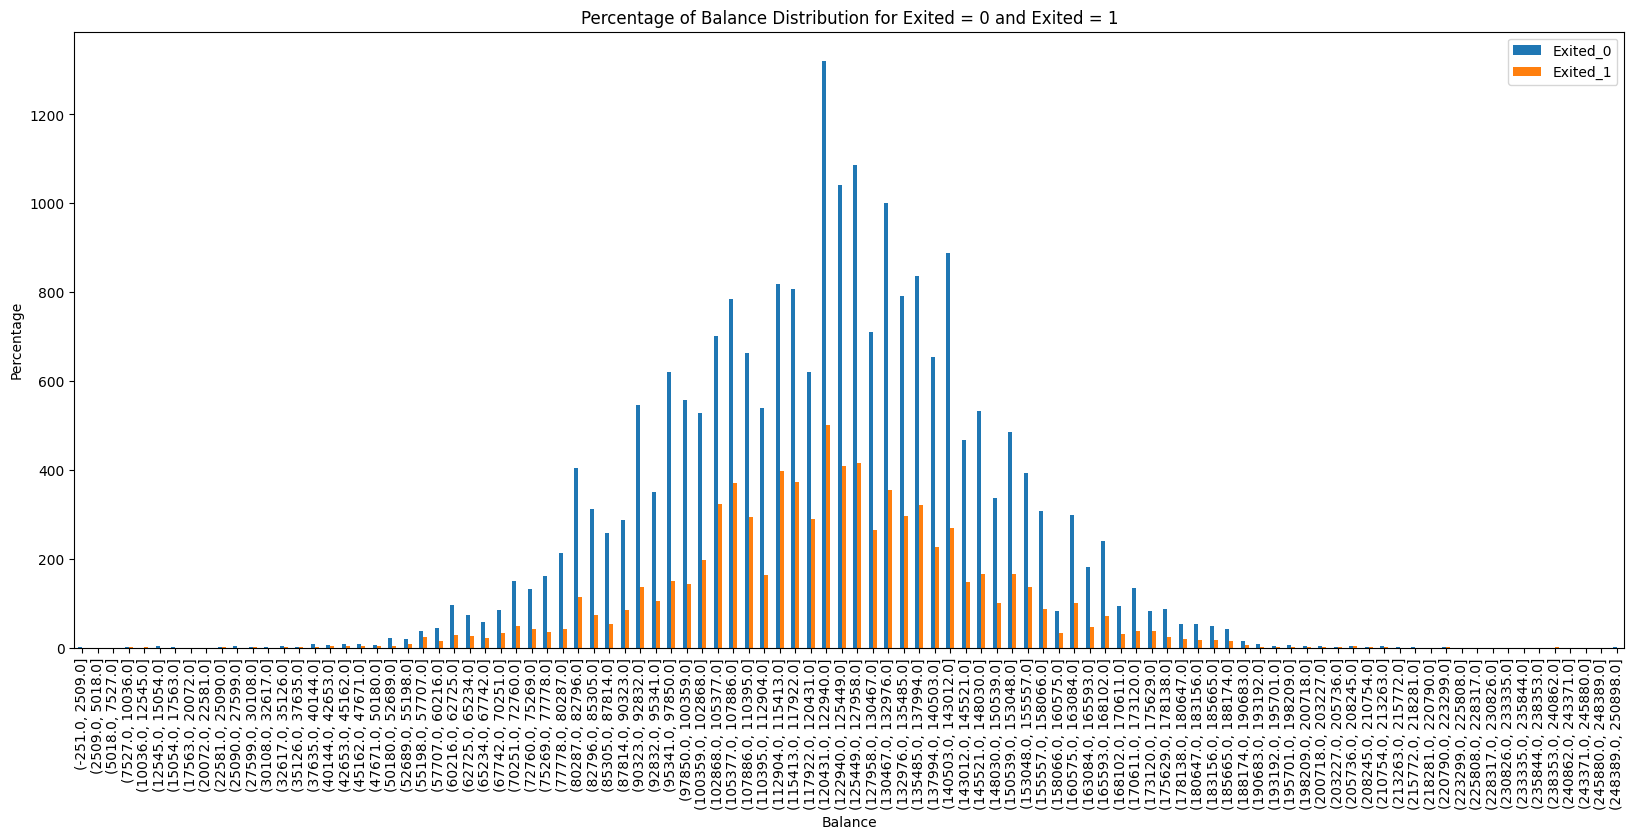

<Figure size 2000x800 with 0 Axes>

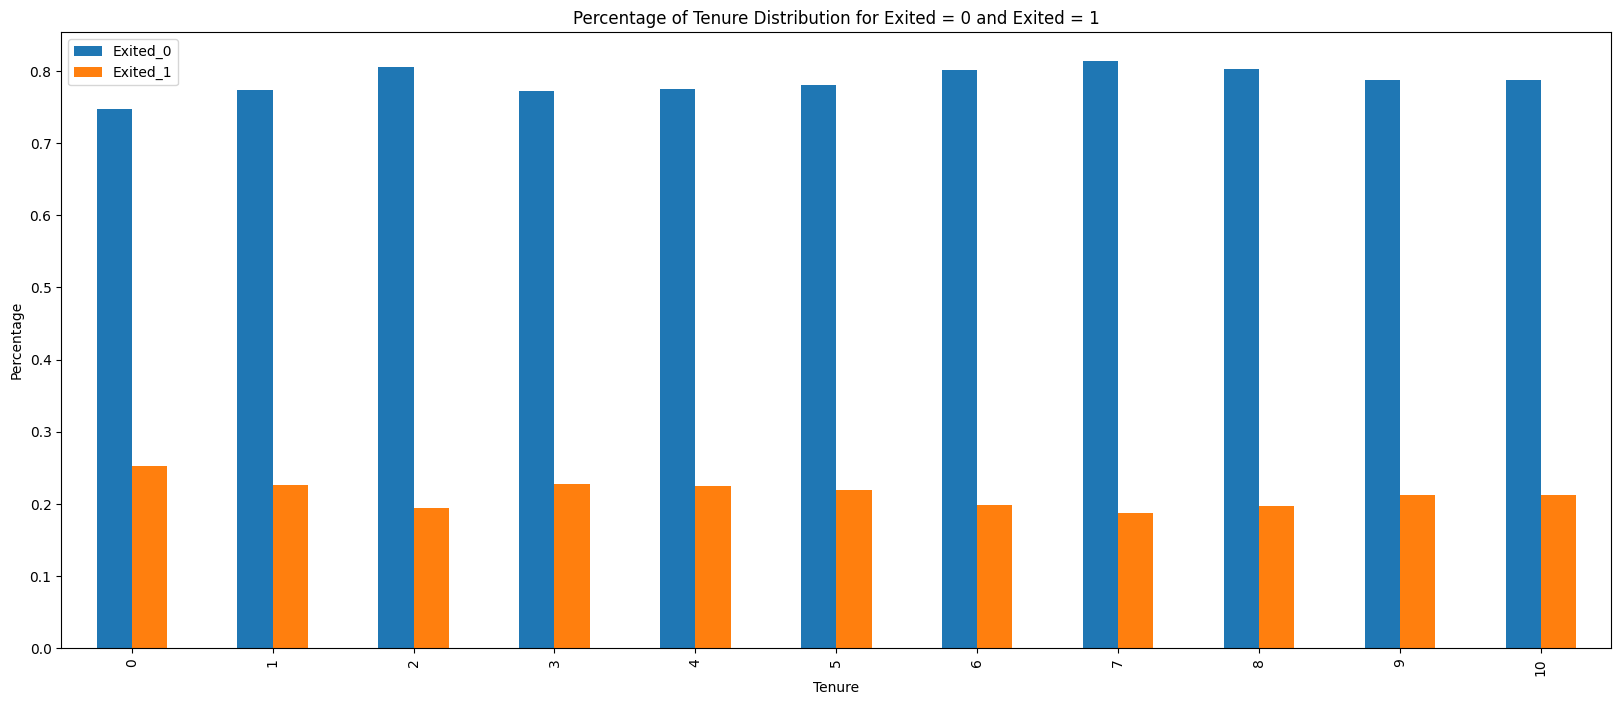

<Figure size 2000x800 with 0 Axes>

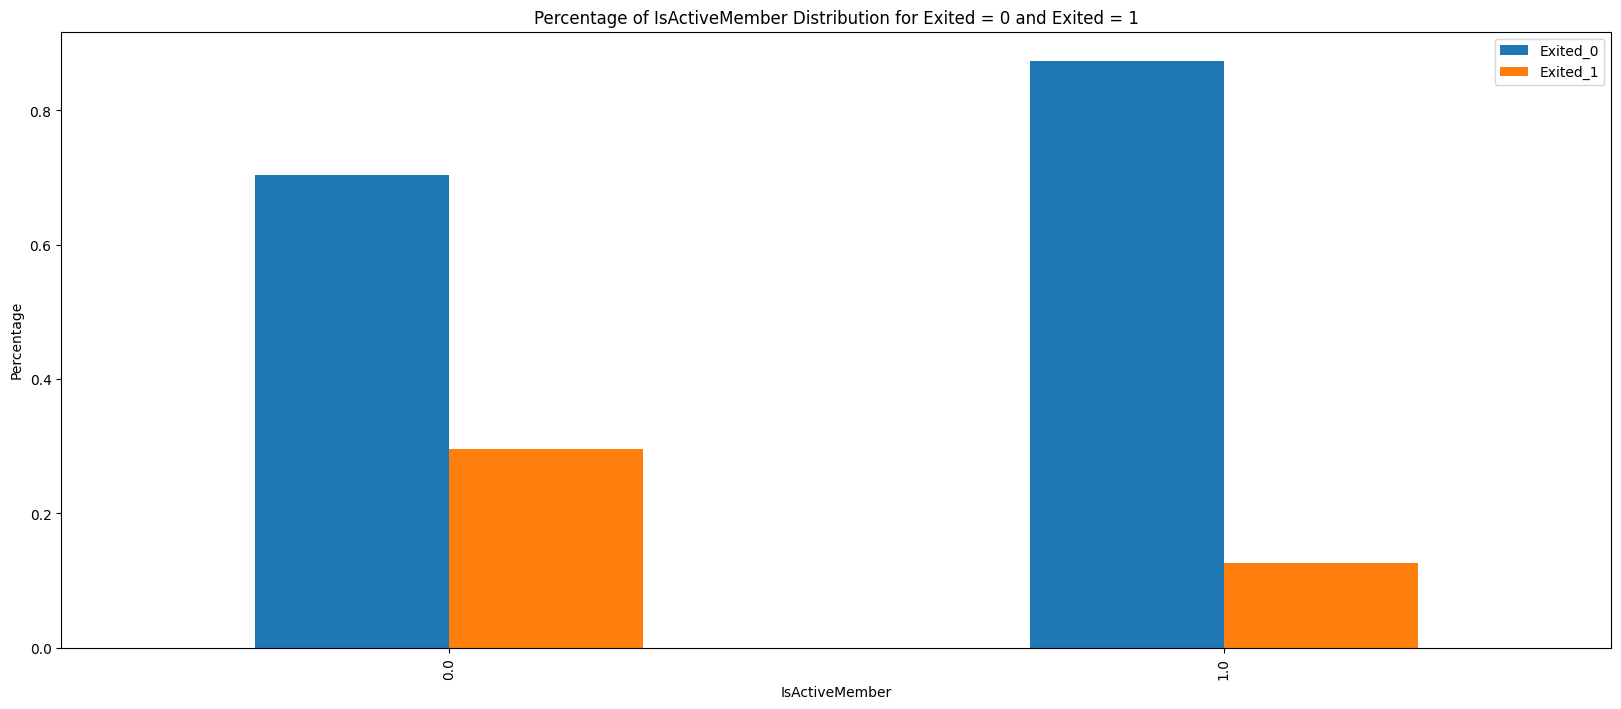

In [136]:
title_list = first_element[:10]
for element in title_list:
    if element in train_df.columns:
        size = train_df[element].value_counts().shape[0]
        ploting(element, k = 100 if size >= 100 else -1)

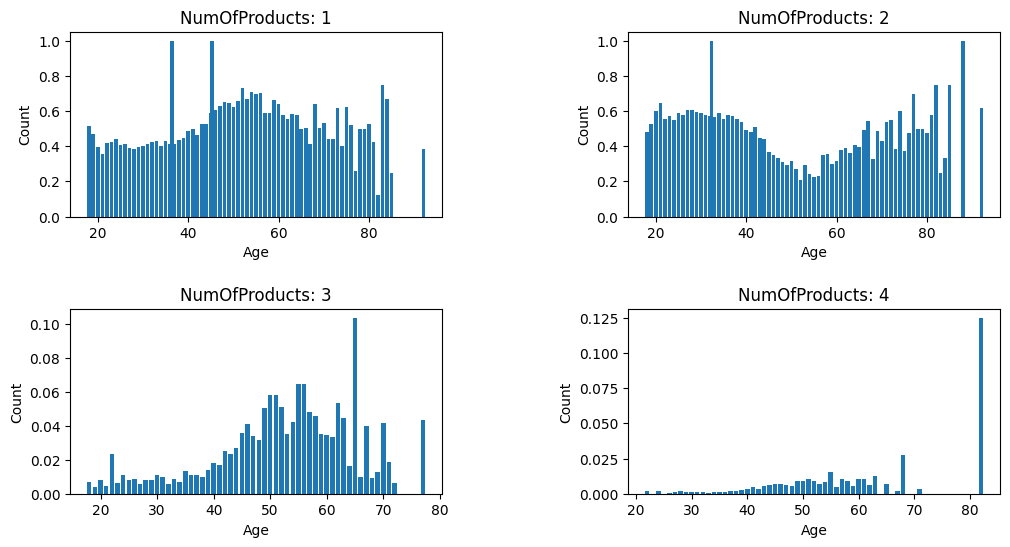

In [197]:

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 6))
total_count = train_df['Age'].value_counts().sort_index()
plt.subplots_adjust(hspace=.5, wspace=.5)
for idx, data in train_df.groupby("NumOfProducts"):
    index = idx - 1
    subplot = axes[index // 2, index % 2]
    value_count = data['Age'].value_counts().sort_index() / total_count
    # print(total_count.index == value_count.index)
    x = value_count.index
    value = value_count.values
    subplot.bar(x= x, height=value)
    subplot.set_title(f"NumOfProducts: {idx}")
    subplot.set_xlabel("Age")
    subplot.set_ylabel("Count")

## Conclusion
* We can levarage a map to filter some data with that features

In [115]:
def model(df):
    age = df['Age']
    answer = 0
    if age < 56 and age > 48:
        answer = 1
    return answer
ans_df = pd.read_csv("../test.csv")
answer = ans_df.apply(model, axis=1)